In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('/content/Data_Train.xlsx')
df.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
3310,Multiple carriers,9/03/2019,Delhi,Cochin,DEL → BOM → COK,17:25,01:35 10 Mar,8h 10m,1 stop,In-flight meal not included,12616
618,Air Asia,3/05/2019,Banglore,Delhi,BLR → DEL,04:55,07:45,2h 50m,non-stop,No info,6181
275,IndiGo,15/03/2019,Mumbai,Hyderabad,BOM → HYD,21:20,22:45,1h 25m,non-stop,No info,2754
1183,Multiple carriers,21/03/2019,Delhi,Cochin,DEL → BOM → COK,16:00,01:35 22 Mar,9h 35m,1 stop,No info,13542
6517,SpiceJet,21/03/2019,Kolkata,Banglore,CCU → BLR,06:55,09:35,2h 40m,non-stop,No info,4148


In [4]:
df.shape

(10683, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
l = df[df.duplicated()==True].index
l

Int64Index([  683,  1061,  1348,  1418,  1674,  1685,  1704,  1807,  1891,
             1971,
            ...
            10533, 10547, 10554, 10573, 10589, 10594, 10616, 10634, 10672,
            10673],
           dtype='int64', length=220)

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(10463, 11)

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
# very small data... so we can remove it...
df.dropna(inplace = True)

In [13]:
df.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route              False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops        False
Additional_Info    False
Price              False
dtype: bool

Exploratory Data Analysis(EDA)

In [14]:
#handle time dependent feature first
df['day']=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day
df['month']= pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.month
df.drop(['Date_of_Journey'],axis=1,inplace=True)
#departure time
df['dept_hour'] =pd.to_datetime(df["Dep_Time"]).dt.hour
df['dept_min'] =pd.to_datetime(df['Dep_Time']).dt.minute
df.drop(['Dep_Time'],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,dept_hour,dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [15]:
#arrival Time
df['arr_hour'] =pd.to_datetime(df["Arrival_Time"]).dt.hour
df['arr_min'] =pd.to_datetime(df["Arrival_Time"]).dt.hour
df.drop(['Arrival_Time'],axis=1, inplace = True)

In [16]:
# duration= differnce b/w Departure Time and Arrival time
duration = list(df["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  
        else:
            duration[i] = "0h " + duration[i]          

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins
df.drop(["Duration"], axis = 1, inplace = True)

**Categorical Data**
Nominal data-> OneHotEncoding
Ordinal data -> LabelEncoding or OrdinalEncoding

In [17]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'day', 'month', 'dept_hour', 'dept_min',
       'arr_hour', 'arr_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [18]:
#Nominal data-> Airline, Destination ,Source
#Ordinal data-> Total_stops, 

In [19]:
df['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

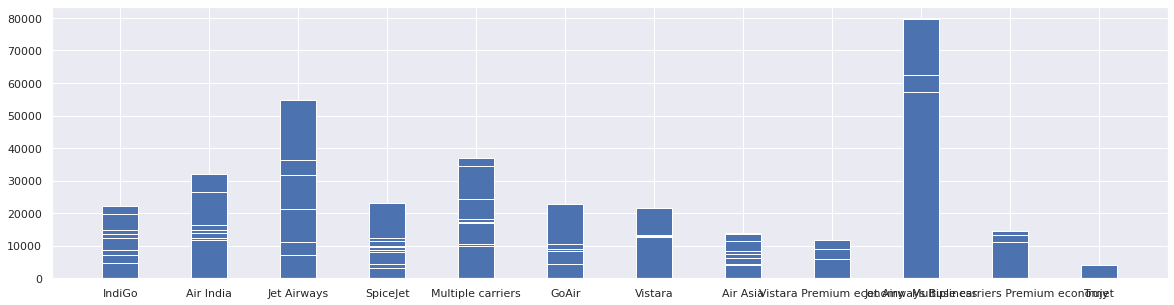

In [20]:
# airline vs price
fig = plt.figure(figsize = (20,5))
plt.bar(df['Airline'],df['Price'],width=0.4)
plt.show()

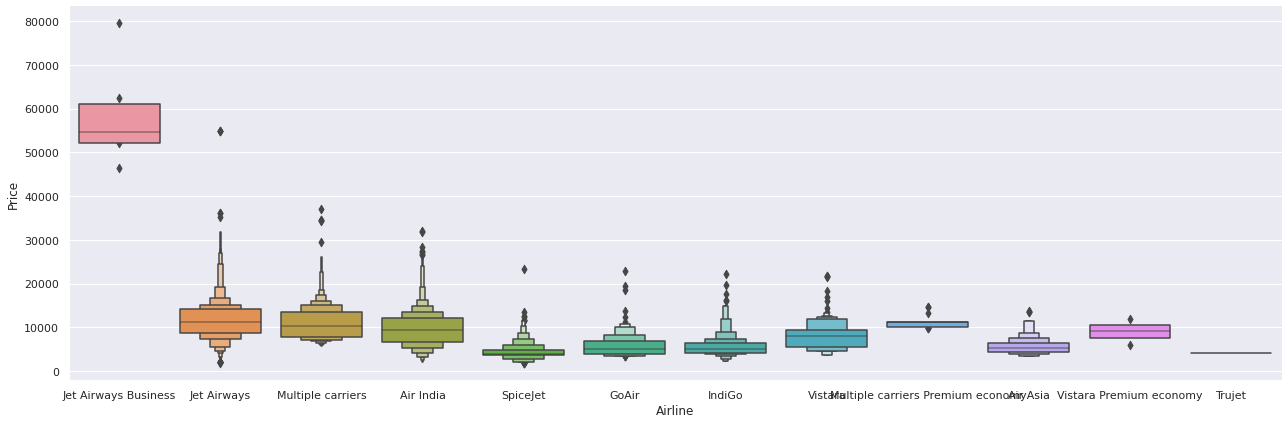

In [21]:
# or using  general categorical...
sns.catplot( x = "Airline",y = "Price", data =df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [22]:
#apply onehotencoding to nominal data 
Airline = df[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [23]:
df["Source"].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

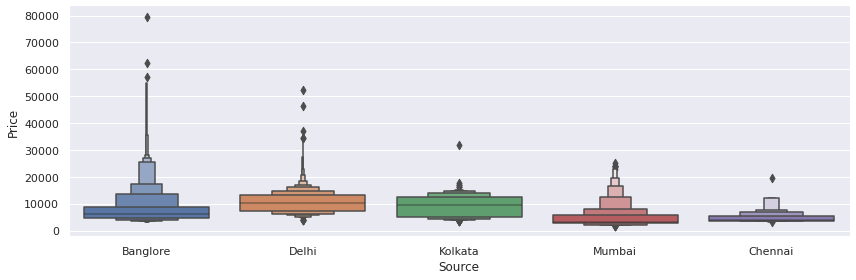

In [24]:
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [25]:
Source = df[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [26]:
df["Destination"].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [27]:
Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [28]:
df["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10462, dtype: object

In [29]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [30]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [31]:
#  Ordinal Categorical ->LabelEncoder
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [32]:
df = pd.concat([df, Airline, Source, Destination], axis = 1)

In [33]:
df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [34]:
df.shape

(10462, 30)

Feature Selection
 **heatmap**
**feature_importance_**
**SelectKBest**

In [35]:
df.columns

Index(['Total_Stops', 'Price', 'day', 'month', 'dept_hour', 'dept_min',
       'arr_hour', 'arr_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [36]:
X = df.loc[:, ['Total_Stops', 'day', 'month', 'dept_hour', 'dept_min',
       'arr_hour', 'arr_min', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [37]:
y = df.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

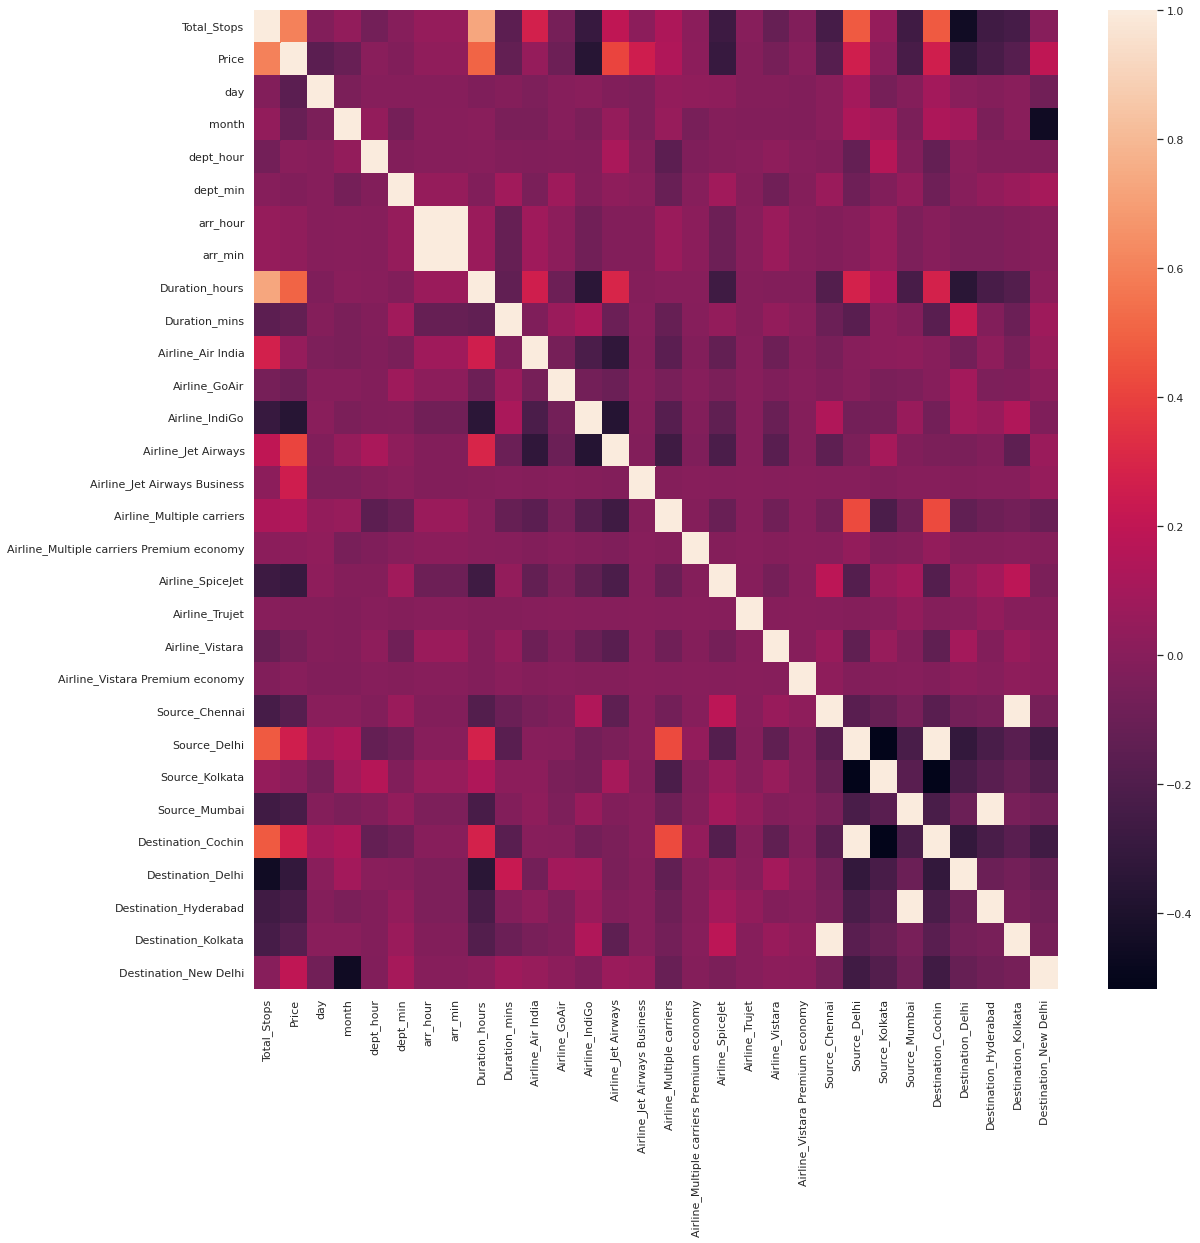

In [38]:
# correlation between Independent and dependent attributes
plt.figure(figsize = (18,18))
sns.heatmap(df.corr())
plt.show()

In [41]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [42]:
selection.feature_importances_

array([2.87940029e-01, 1.44995417e-01, 5.66505483e-02, 4.04890906e-02,
       3.14541077e-02, 2.75138318e-02, 2.81842073e-02, 1.72848417e-02,
       1.50324415e-03, 1.21933243e-02, 1.49719851e-01, 6.89716422e-02,
       2.04787315e-02, 1.01777285e-03, 3.11569867e-03, 1.90901361e-04,
       5.96021066e-03, 8.66572361e-05, 5.36358522e-04, 1.96334109e-02,
       3.03680287e-03, 6.03886690e-03, 1.75139151e-02, 2.07418138e-02,
       9.01931817e-03, 5.36446366e-04, 2.51929598e-02])

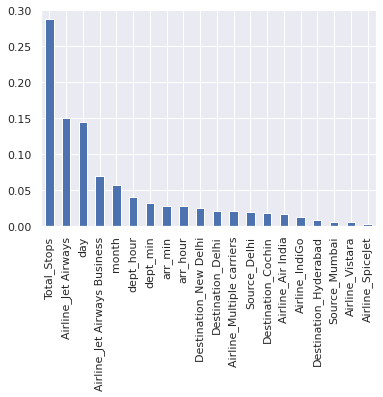

In [44]:
feature_imp = pd.Series(selection.feature_importances_,index= X.columns)
feature_imp.nlargest(20).plot(kind='bar')   #for vetical direction -> barh
plt.show()

Fitting mode-> Random Forest

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

reg_rf.score for train: 0.9526009917501459
reg_rf.score for test: 0.81344756089436


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


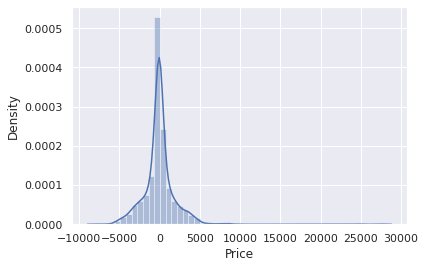

In [47]:
y_pred = reg_rf.predict(X_test)
print("reg_rf.score for train:",reg_rf.score(X_train, y_train))
print("reg_rf.score for test:",reg_rf.score(X_test, y_test))
sns.distplot(y_test-y_pred)
plt.show()

In [48]:
# The distplot represents the univariate distribution of data i.e. 
# data distribution of a variable against the density distribution.

In [50]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE: 1189.8162105498022
MSE: 3889669.9143254347
RMSE: 1972.2246105161132


In [51]:
metrics.r2_score(y_test,y_pred)

0.81344756089436

Hyperparameter Tuning

**RandomizedSearchCV, GridSearchCV**

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [54]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [55]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, random_state=42)
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [56]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


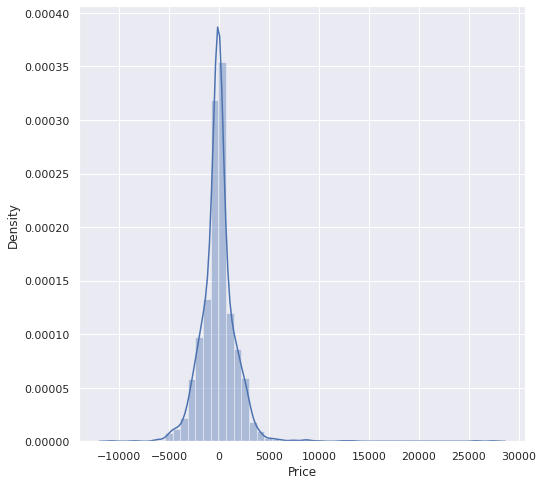

In [57]:
prediction = rf_random.predict(X_test)
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

In [58]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1160.7363418160794
MSE: 3534346.988555587
RMSE: 1879.985901158726
